In [1]:
from __future__ import print_function
import torch as t

In [3]:
a = t.Tensor(2, 3)
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
b = t.Tensor([[1, 2, 3],[4, 5, 6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [5]:
b.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [6]:
a = t.arange(0, 6)
a.view(2,3)

tensor([[0, 1, 2],
        [3, 4, 5]])

In [8]:
b = a.view(-1, 3)
b

tensor([[0, 1, 2],
        [3, 4, 5]])

In [9]:
b.unsqueeze(1)

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [10]:
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0)

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [11]:
a = t.randn(3, 4)
a

tensor([[-0.3716,  0.1426,  0.0903, -0.3309],
        [-0.9575,  2.7384,  0.1268,  0.7977],
        [ 1.3198, -0.0842, -1.2245,  0.5185]])

In [12]:
a[0]

tensor([-0.3716,  0.1426,  0.0903, -0.3309])

In [13]:
a[:, 0]

tensor([-0.3716, -0.9575,  1.3198])

In [14]:
a[0][2]

tensor(0.0903)

In [15]:
a[:2]

tensor([[-0.3716,  0.1426,  0.0903, -0.3309],
        [-0.9575,  2.7384,  0.1268,  0.7977]])

In [16]:
x = t.arange(0, 27).view(3, 3, 3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [17]:
x[0]

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [18]:
x[0][0]

tensor([0, 1, 2])

In [19]:
import matplotlib.pyplot as plt
from IPython import display

In [24]:
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    
    return x, y

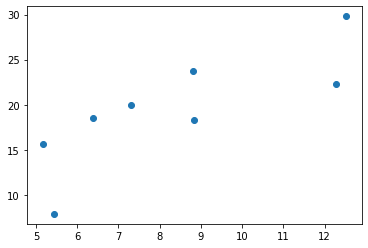

In [25]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [36]:
w = t.rand(1, 1)
b = t.zeros(1, 1)

lr = 0.001

for ii in range(20000):
    
    x, y = get_fake_data()
    
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%1000 ==0:
        
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        y = x.mm(w) + b
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        
print(w.squeeze(), b.squeeze())

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'mat2'